In [50]:
## 查看icesat数据
import h5py
import numpy as np
from pyrsimg import readTiff, second_to_dyr,imgShow
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
path_glah14 = 'data/laser/GLAH14_634_2123_002_0351_0_01_0001.H5'
path_rsimg = 'data/rsimg/s2_gla_region_20220707.tif'

In [13]:
# !h5ls $path_glah14/Data_40HZ/Elevation_Surfaces
# !h5ls $path_glah14/Data_40HZ/Geolocation
!h5ls $path_glah14/Data_40HZ/Time



d_UTCTime_40             Dataset {1094280/Inf}
i_rec_ndx                Dataset {1094280/Inf}
i_shot_count             Dataset {1094280/Inf}


In [32]:
with h5py.File(path_glah14, 'r') as glah14:
    lat = glah14['Data_40HZ/Geolocation/d_lat'][:]
    lon = glah14['Data_40HZ/Geolocation/d_lon'][:]
    elev = glah14['Data_40HZ/Elevation_Surfaces/d_elev'][:]
    time = glah14['Data_40HZ/Time/d_UTCTime_40'][:]
print(elev.shape)
rsimg = readTiff(path_rsimg)

(1094280,)


In [24]:
## 2000-1-1
time_dyr = second_to_dyr(time)
time_dyr

array([2008.20687296, 2008.20687296, 2008.20687296, ..., 2008.20937413,
       2008.20937413, 2008.20937413], shape=(1094280,))

In [43]:
## 位置异常值剔除
idx = np.where((abs(lat)<90)&(lon<360)&(lon>0))
lat_, lon_, time_, elev_ = lat[idx], lon[idx], time[idx], elev[idx]
elev_.shape
print(lat_.shape)
print(lon_.shape)

(979753,)
(979753,)


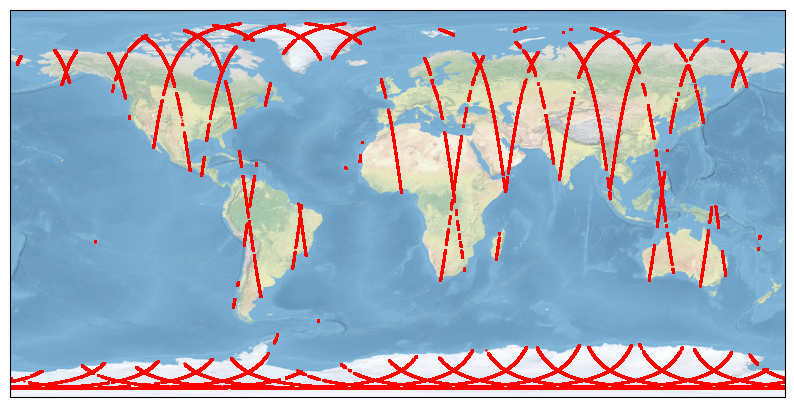

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
lon_2 = lon_.copy()
lon_2[lon_2>180] = lon_2[lon_2>180] - 360
ax.plot(lon_2, lat_, '.', markersize=1, color='red')


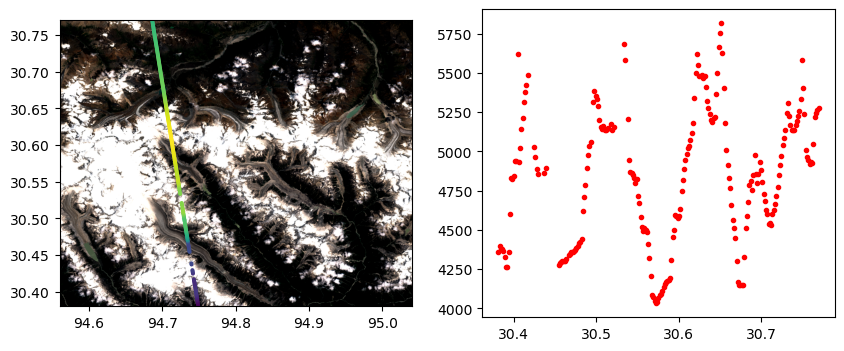

In [60]:
ids = np.where((lat_>30.38)&(lat_<30.77)&(lon_2>94.56)&(lon_2<95.04))
fig, ax = plt.subplots(1,2, figsize=(10,4))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=20, ax=ax[0])
ax[0].scatter(x=lon_2[ids], y=lat_[ids], s=3.5, c=elev[ids])
ax[1].plot(lat_[ids], elev_[ids], 'r.')
